In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
chunks = pd.read_csv('flights.csv', chunksize=10000)
dfs = [] 
for chunk in chunks:
    df_flights = pd.DataFrame(chunk)
    dfs.append(df_flights)
df = pd.concat(dfs)

In [3]:
pd.set_option('display.max_columns', None)
print(df.head(2)) 
print(df.isnull().sum())
# df.info()
# print(df.describe()) 

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX                 PBI                   10             2.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0            -11.0      21.0        15.0           205.0         194.0   
1             -8.0      12.0        14.0           280.0         279.0   

   AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0     169.0      1448      404.0      4.0                430         408.0   
1     263.0      2330      737.0      4.0                750         741.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0 

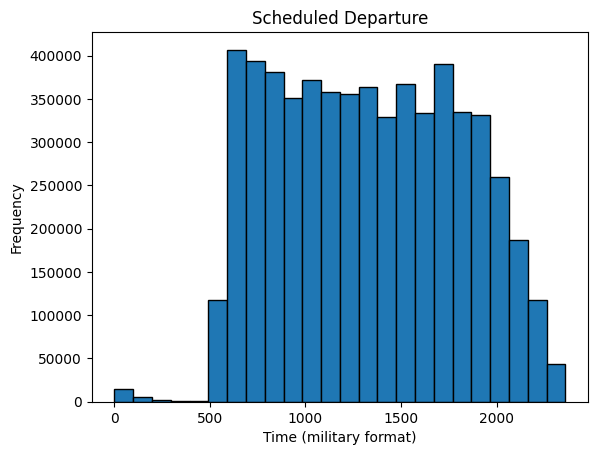

In [4]:
plt.hist(df['SCHEDULED_DEPARTURE'], bins=24, edgecolor='black')
plt.xlabel('Time (military format)')
plt.ylabel('Frequency')
plt.title('Scheduled Departure')
plt.show()

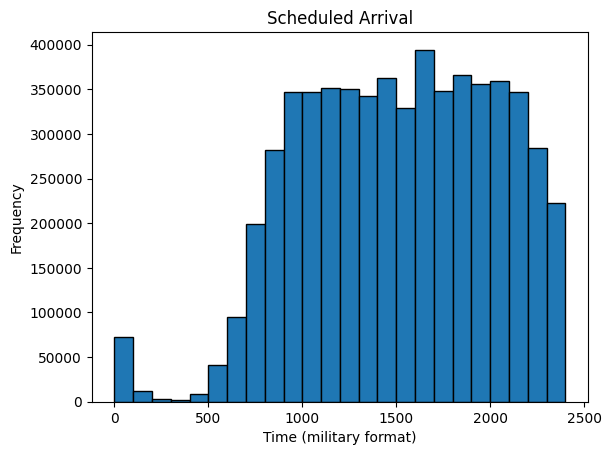

In [5]:
plt.hist(df['SCHEDULED_ARRIVAL'], bins=24, edgecolor='black')
plt.xlabel('Time (military format)')
plt.ylabel('Frequency')
plt.title('Scheduled Arrival')
plt.show()

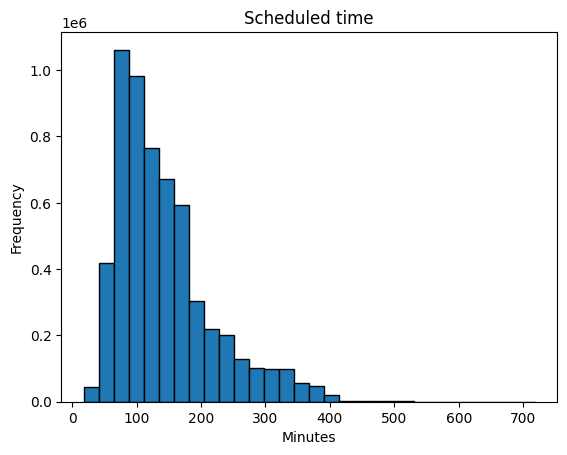

In [6]:
plt.hist(df['SCHEDULED_TIME'], bins=30, edgecolor='black')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Scheduled time')
plt.show()

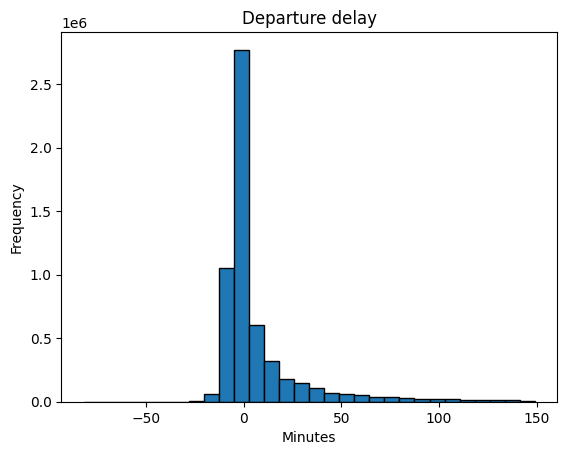

In [7]:
ddelays_woo = df[df['DEPARTURE_DELAY'] < 150] # without outliars
plt.hist(ddelays_woo['DEPARTURE_DELAY'], bins=30, edgecolor='black')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Departure delay')
plt.show()

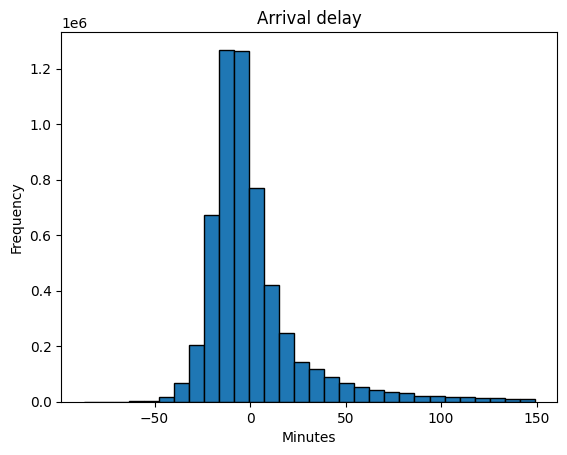

In [8]:
adelays_woo = df[df['ARRIVAL_DELAY'] < 150] # without outliars
plt.hist(adelays_woo['ARRIVAL_DELAY'], bins=30, edgecolor='black')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Arrival delay')
plt.show()

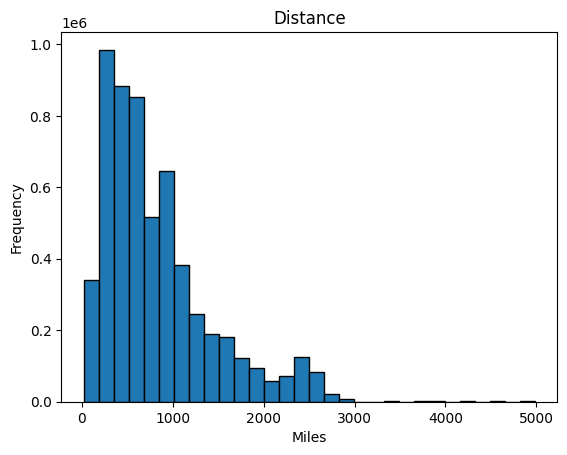

In [9]:
plt.hist(df['DISTANCE'], bins=30, edgecolor='black')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distance')
plt.show()

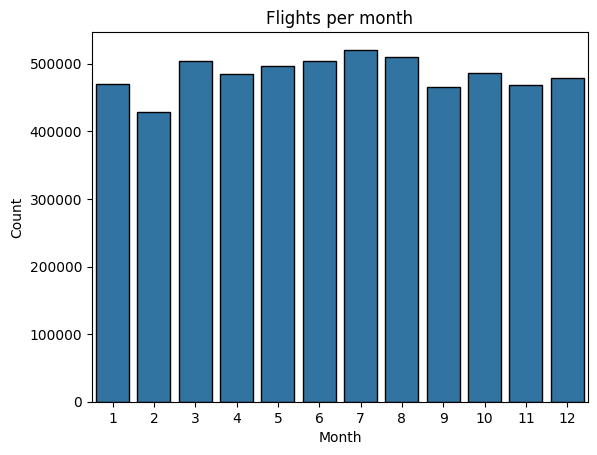

In [10]:
sns.countplot(data=df, x='MONTH', color="#1f77b4", edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Flights per month')
plt.show()

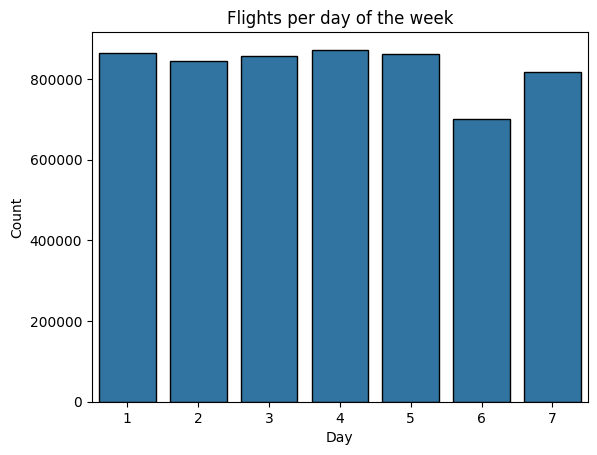

In [11]:
sns.countplot(data=df, x='DAY_OF_WEEK', color="#1f77b4", edgecolor='black')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Flights per day of the week')
plt.show()

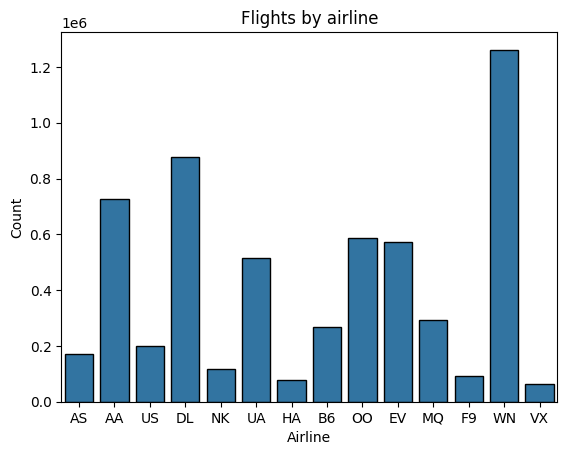

In [12]:
sns.countplot(data=df, x='AIRLINE', color="#1f77b4", edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Flights by airline')
plt.show()

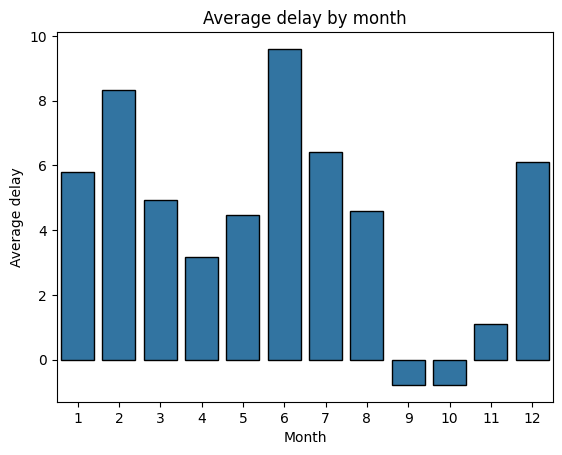

In [13]:
months_delays = df.groupby('MONTH')['ARRIVAL_DELAY'].mean().reset_index()
sns.barplot(data=months_delays, x='MONTH', y='ARRIVAL_DELAY', color="#1f77b4", edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Average delay')
plt.title('Average delay by month')
plt.show()

# there seem to be a higher average delay on months when there is a higher amount of flights

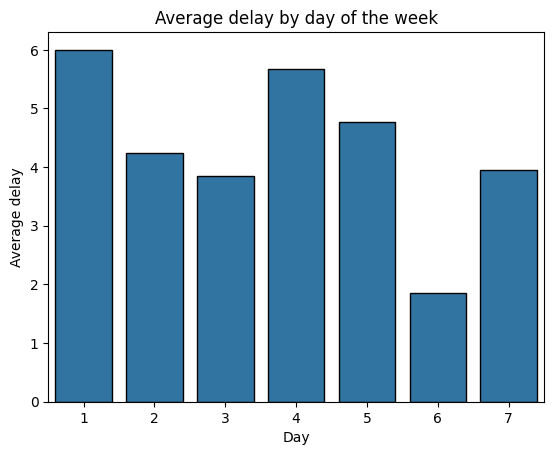

In [14]:
days_delays = df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean().reset_index()
sns.barplot(data=days_delays, x='DAY_OF_WEEK', y='ARRIVAL_DELAY', color="#1f77b4", edgecolor='black')
plt.xlabel('Day')
plt.ylabel('Average delay')
plt.title('Average delay by day of the week')
plt.show()

# there seem to be a higher average delay on days when there is a higher amount of flights

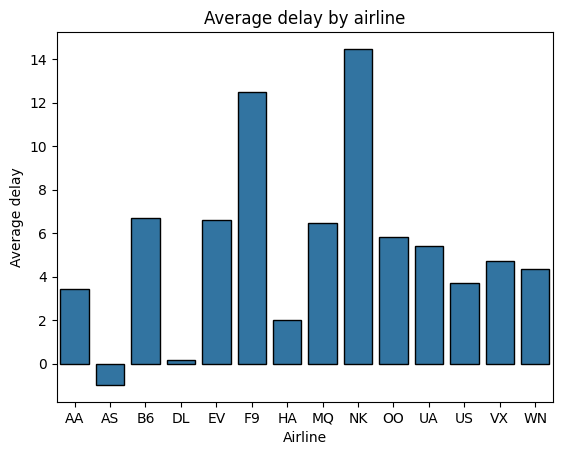

In [15]:
airline_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().reset_index()
sns.barplot(data=airline_delays, x='AIRLINE', y='ARRIVAL_DELAY', color="#1f77b4", edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Average delay')
plt.title('Average delay by airline')
plt.show()

In [16]:
print('Percentage of flights diverted:', df['DIVERTED'].mean().round(4)*100)
print('Percentage of flights cancelled:', df['CANCELLED'].mean().round(4)*100)

Percentage of flights diverted: 0.26
Percentage of flights cancelled: 1.54


In [17]:
df[['ARRIVAL_DELAY', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']].corr()

# weak positive correlation between delay and scheduled departure/arrival (perhaps because delays accumulate during the day)

,ARRIVAL_DELAY,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL
ARRIVAL_DELAY,1.000000,0.100220,0.088824
SCHEDULED_DEPARTURE,0.100220,1.000000,0.706237
SCHEDULED_ARRIVAL,0.088824,0.706237,1.000000


In [18]:
df = df.drop(['YEAR', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1)
print(df.head(2)) 
print(df.isnull().sum())

   MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0      1    1            4      AS            ANC                 SEA   
1      1    1            4      AA            LAX                 PBI   

   SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  DISTANCE  \
0                    5            -11.0           205.0      1448   
1                   10             -8.0           280.0      2330   

   SCHEDULED_ARRIVAL  ARRIVAL_DELAY  CANCELLED  
0                430          -22.0          0  
1                750           -9.0          0  
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY         86153
SCHEDULED_TIME              6
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY          105071
CANCELLED                   0
dtype: int64


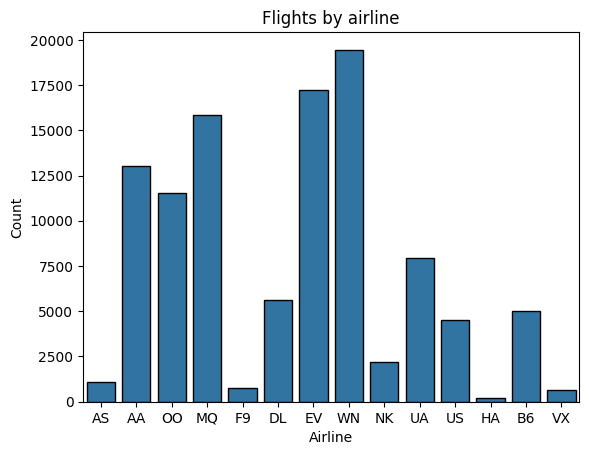

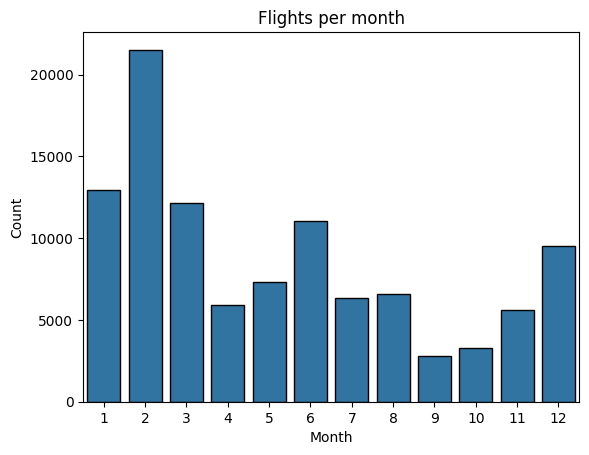

    MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
32      1    1            4      AS            ANC                 SEA   
42      1    1            4      AA            PHX                 DFW   
68      1    1            4      OO            MAF                 IAH   

    SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  DISTANCE  \
32                  135              NaN           205.0      1448   
42                  200              NaN           120.0       868   
68                  510              NaN            87.0       429   

    SCHEDULED_ARRIVAL  ARRIVAL_DELAY  CANCELLED  
32                600            NaN          1  
42                500            NaN          1  
68                637            NaN          1  
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_TIME        

In [19]:
sub_df_1 = df[df['ARRIVAL_DELAY'].isna()]

sns.countplot(data=sub_df_1, x='AIRLINE', color="#1f77b4", edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Flights by airline')
plt.show()

sns.countplot(data=sub_df_1, x='MONTH', color="#1f77b4", edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Flights per month')
plt.show()

print(sub_df_1.head(3)) 

# na in ARRIVAL_DELAY and DEPARTURE_DELAY will be dropped as they regard cancelled flights

sub_df_2 = df[df['CANCELLED'] != 1]
sub_df_2 = sub_df_2.dropna(subset=['ARRIVAL_DELAY'])
print(sub_df_2.isnull().sum())

In [20]:
# Binary variable for 'Flight_delayed'

sub_df_2['departure_delayed'] = sub_df_2['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)
sub_df_2['arrival_delayed'] = sub_df_2['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
# Counting number of occurences grouped by Month and Day

def assign_flight_counts(sub_df_2):
    # Deaprtures
    departure_counts = sub_df_2.groupby(['MONTH', 'DAY', 'ORIGIN_AIRPORT']).size().reset_index(name='NUM_DEPARTURES')

    # Arrivals
    arrival_counts = sub_df_2.groupby(['MONTH', 'DAY', 'DESTINATION_AIRPORT']).size().reset_index(name='NUM_ARRIVALS')

    # Merging back to original dataframe (Departures)
    sub_df_2 = pd.merge(sub_df_2, departure_counts, how='left', on=['MONTH', 'DAY', 'ORIGIN_AIRPORT'])

    # Merging back to original dataframe (Arrivals)
    sub_df_2 = pd.merge(sub_df_2, arrival_counts, how='left', on=['MONTH', 'DAY', 'DESTINATION_AIRPORT'])

    return sub_df_2

sub_df_3 = assign_flight_counts(sub_df_2)

# Reordering columns
cols = sub_df_3.columns.tolist()  # Get the current column order as a list

# Getting index of origin and destination airport for location
origin_index = cols.index('ORIGIN_AIRPORT')
destination_index = cols.index('DESTINATION_AIRPORT')

# Removing duplicated
cols = [col for col in cols if col not in ['NUM_DEPARTURES', 'NUM_ARRIVALS']]

# Insert 'num_departures' after 'ORIGIN_AIRPORT'
cols.insert(origin_index + 1, 'NUM_DEPARTURES') # +1 for correct location

# Insert 'num_arrivals' after 'DESTINATION_AIRPORT'
cols.insert(destination_index + 2, 'NUM_ARRIVALS') # +2 for correct location

sub_df_3 = sub_df_3[cols]

print(sub_df_3.head(3))

   MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT  NUM_DEPARTURES  \
0      1    1            4      AS            ANC              38   
1      1    1            4      AA            LAX             552   
2      1    1            4      US            SFO             425   

  DESTINATION_AIRPORT  NUM_ARRIVALS  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  \
0                 SEA           276                    5            -11.0   
1                 PBI            81                   10             -8.0   
2                 CLT           287                   20             -2.0   

   SCHEDULED_TIME  DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  CANCELLED  \
0           205.0      1448                430          -22.0          0   
1           280.0      2330                750           -9.0          0   
2           286.0      2296                806            5.0          0   

   departure_delayed  arrival_delayed  
0                  0                0  
1                  0         

In [22]:
def calculate_day_of_year(row):
    date = datetime.datetime(year=2015, month=row['MONTH'], day=row['DAY'])  
    return date.timetuple().tm_yday  

sub_df_3['DAY_OF_YEAR'] = sub_df_3.apply(calculate_day_of_year, axis=1)





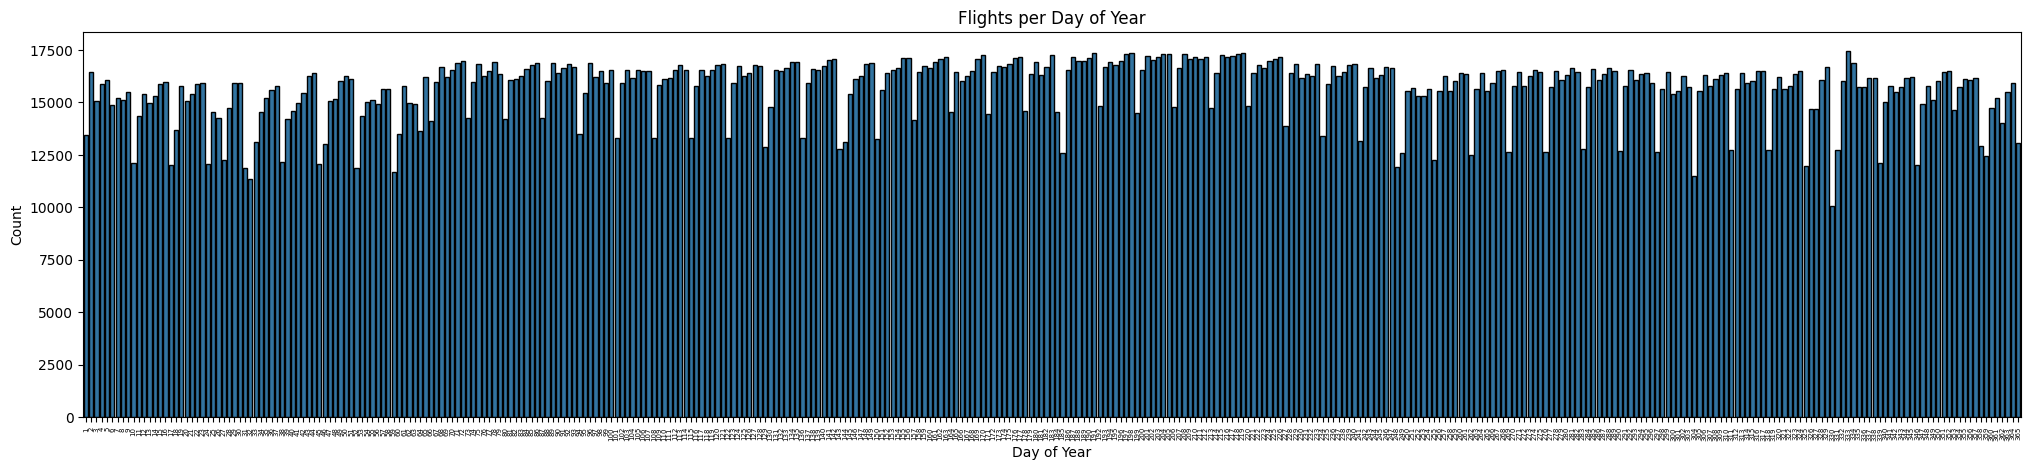

In [23]:
plt.figure(figsize=(25, 5))  
sns.countplot(data=sub_df_3, x='DAY_OF_YEAR', color="#1f77b4", edgecolor='black')
plt.xticks(rotation=90, fontsize=5)  
plt.xlabel('Day of Year')
plt.ylabel('Count')
plt.title('Flights per Day of Year')
plt.show()